[Link a repositorio en GitHub](https://github.com/tdm09/reto2-real_estate-los-errescuer)

# Importar bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
%matplotlib inline
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 23.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## Importar módulos de Scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.evaluate import bias_variance_decomp


# Importar Dataset

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per \$10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in \$1000's

In [ ]:
url = "https://raw.githubusercontent.com/crisb-7/BostonRealEstate/main/bostonRealEstate.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploración del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


Al ver que se tienen solo 5 registros con valores nulos para RM, se quitan estas filas para tener un conjunto de datos homogéneo.

In [ ]:
df = df.dropna(axis = 0)
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617404,11.289526,11.174842,0.069170,0.555209,6.287589,68.555731,3.775231,9.531621,408.330040,18.498419,356.228379,12.872569,22.711858
std,8.600123,23.325350,6.824592,0.253994,0.115611,0.703802,28.161573,2.096147,8.716661,168.382685,2.202078,91.253462,7.823528,9.520520
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.098500,4.000000,280.250000,17.400000,374.687500,6.950000,17.025000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.122200,5.000000,330.000000,19.100000,391.260000,11.465000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629750,93.975000,5.117675,24.000000,666.000000,20.200000,396.210000,17.107500,25.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


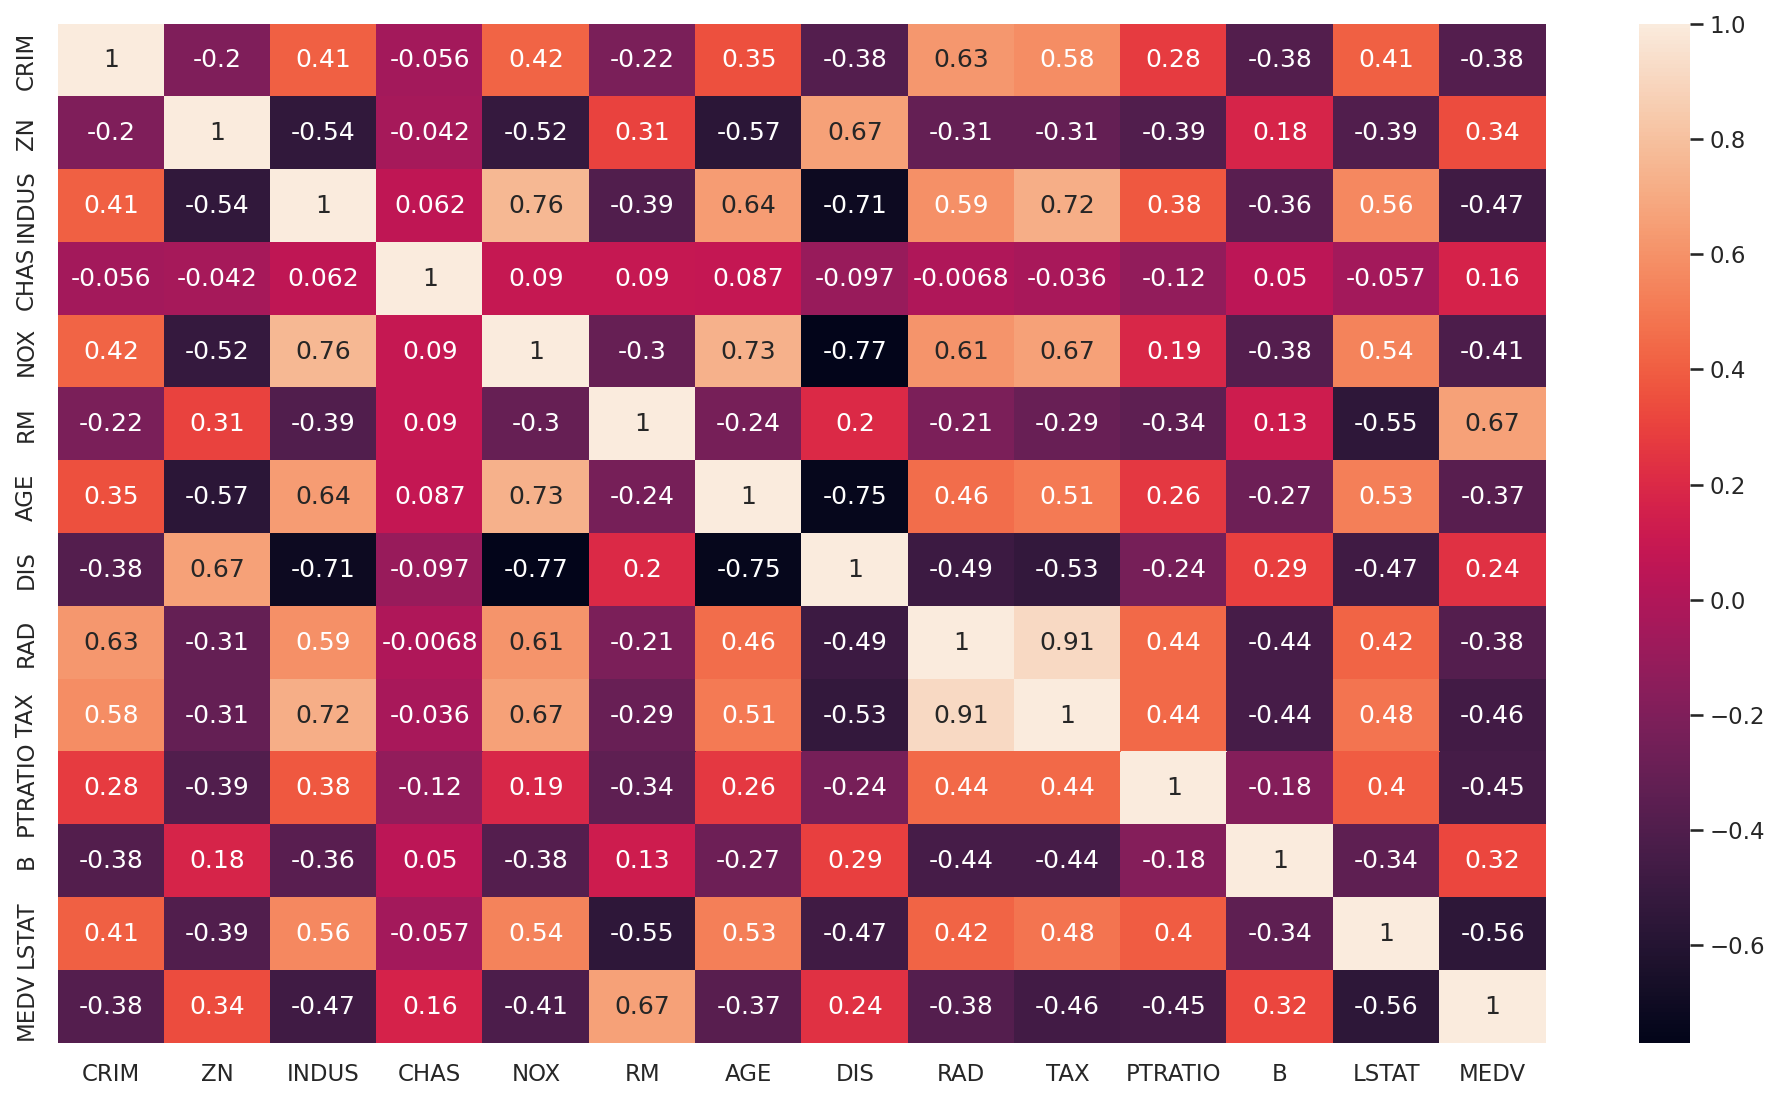

In [ ]:
sns.set(rc={'figure.figsize':(16, 9)})
plt.rcParams["figure.dpi"] = 150
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# sns.pairplot(df)
# plt.show()

# Preprocesamiento de los datos

In [ ]:
scaler = StandardScaler()

In [ ]:
x = scaler.fit_transform(df.drop(columns = "MEDV"))
y = df.MEDV
y= y.values

# División train-test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.90, random_state = 0)

# Model Cross-validation

In [ ]:
randomState = 0

Regressors = []

# Regressors.append(MLPRegressor(random_state = randomState, activation = "relu", solver = "adam", 
#                       hidden_layer_sizes = (100,), alpha = 0.0001, learning_rate = "constant", 
#                       learning_rate_init = 0.0005, max_iter = 5000))

Regressors.append(MLPRegressor(random_state = randomState, activation = "relu", solver = "adam", 
                      hidden_layer_sizes = (100,), alpha = 0.0101, learning_rate = "adaptive", 
                      learning_rate_init = 0.1, max_iter = 1000))

Regressors.append(KNeighborsRegressor(n_neighbors = 2, weights = "uniform", p = 1))

Regressors.append(DecisionTreeRegressor(random_state=randomState))

Regressors.append(RandomForestRegressor(n_estimators = 250, max_depth = 7, random_state=randomState))

Regressors.append(SVR(C = 40.7, epsilon=0.56))

Regressors.append(NuSVR(C = 31.2, nu=0.5))

Regressors.append(AdaBoostRegressor(random_state = randomState))

Regressors.append(GradientBoostingRegressor(random_state = randomState))

Regressors.append(GaussianProcessRegressor(random_state = randomState))

Regressors.append(HistGradientBoostingRegressor(random_state = randomState))

cv_results = []
cv_train_score = []
for regressor in Regressors:
    cv_train=regressor.fit(x_train, y = y_train)
    cv_train_score.append(regressor.score(x_train, y_train))
    cv_results.append(regressor.score(x_test, y_test))
    
cv_res = pd.DataFrame({"Algorithm":["NN", "KN","Decision Tree","Random Forest","SVR","NuSVR","AdaBoost","GradientBoost", "GaussianProcess", "HistGradientBoosting"], 
                       "TrainScore":cv_train_score, "TestScore":cv_results})
cv_res.sort_values(by = "TestScore", ascending = False)

,Algorithm,TrainScore,TestScore
7,GradientBoost,0.971574,0.909959
3,Random Forest,0.952958,0.854074
0,NN,0.897917,0.823250
9,HistGradientBoosting,0.958757,0.808177
1,KN,0.929634,0.794065
2,Decision Tree,1.000000,0.778517
4,SVR,0.913308,0.746149
5,NuSVR,0.904299,0.719656
6,AdaBoost,0.862871,0.644497
8,GaussianProcess,1.000000,-0.304075


# Mejora del modelo

Mejoramos el modelo que nos dio más precisión en el test set (GradientBoost) aplicando un tuning de hiperparámetros con ayuda de RandomizedSearchCV

In [ ]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(50,1000),
              'max_depth'    : sp_randInt(2,10)
              }

random = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv = 2, n_jobs=-1)
random.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf5dc578d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf5dc76b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf5dc76e90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf5dc57e10>})

In [ ]:
random.best_estimator_

GradientBoostingRegressor(learning_rate=0.03039604699664189, n_estimators=420,
                          subsample=0.8699095805674916)

In [ ]:
random.score(x_test,y_test)

0.91173883344591

In [ ]:
random.score(x_train,y_train)

0.9801051973743056

# Visualización

In [ ]:
pred = {'Real Value':y_test, 'Prediction': random.predict(x_test)}
predictions_df = pd.DataFrame(pred)

plt.plot(predictions_df['Real Value'])
plt.plot(predictions_df.Prediction)

plt.legend(["Real Value", "Prediction"], loc=0)
plt.show()